<a href="https://colab.research.google.com/github/Ascharya07/Data-Preprocessing/blob/master/EDA_Habermandataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset has the attributes of women who underwent surgery for breast cancer. In this data we have 3 features and 1 class decribing the life span of the patient.
 

*   nodes: As the number goes up, higher is the risk of cancer.
*   Age : This represents at which age they underwent surgery.
* year: This feature represents in which year the patient underwent the surgery.
*   status: It has 1 and 2, indicating 1 for patients survived more than 5 years. 2 for patients who survived less than 5 years.













In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data =pd.read_csv("/content/haberman.csv")


In [4]:
import warnings 

warnings.filterwarnings("ignore")

In [5]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
data.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [8]:
max(data["age"])

83

Shape of the data:
This shows how many observations were made for the given attributes.

In [9]:
#Number of data-points and features?
print(data.shape)

(306, 4)


In [10]:
#Coulmn names in our dataset
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [11]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Scatter plot: Here we see graph of age vs nodes. Showing the patients with nodes at different ages, however we are unable distinguish between survival status. 

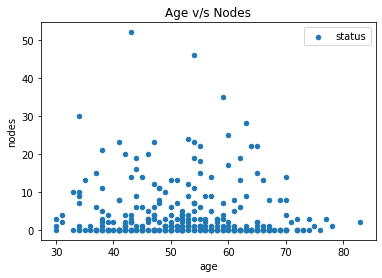

In [12]:
#2D scatter plot

data.plot(kind='scatter', x='age', y="nodes")
plt.legend(['status'], prop={'size':10})
plt.title('Age v/s Nodes')
plt.show()

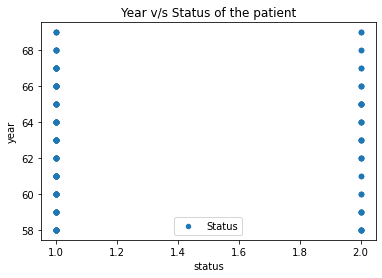

In [13]:
data.plot(kind='scatter', x='status', y="year")
plt.legend(['Status'])
plt.title("Year v/s Status of the patient")
plt.show()


There are all groups of ages in patients who survived more than 5 years and less than 5 years.

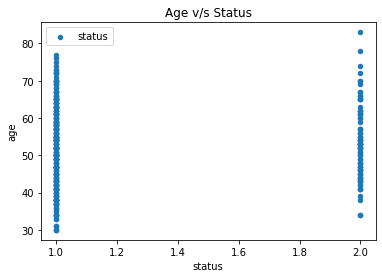

In [14]:
data.plot(kind='scatter', x='status', y="age")
plt.title("Age v/s Status")
plt.legend(["status"])
plt.show()



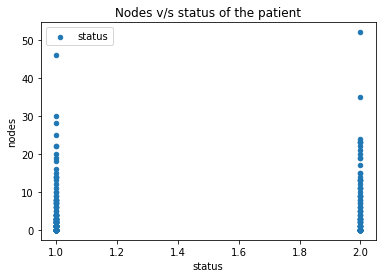

In [15]:
data.plot(kind='scatter', x='status', y="nodes")
plt.title('Nodes v/s status of the patient')
plt.legend(['status'])
plt.show()

In [16]:
import seaborn as sns

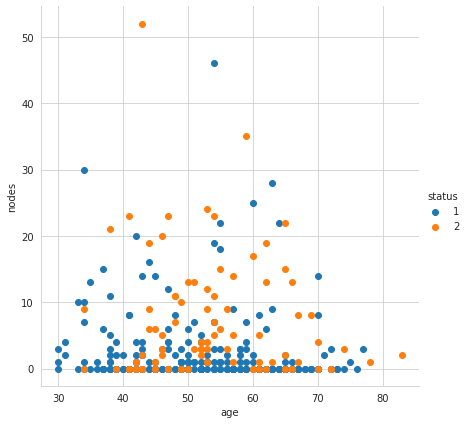

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status",size=6)\
   .map(plt.scatter, "age","nodes")\
   .add_legend()
plt.show()

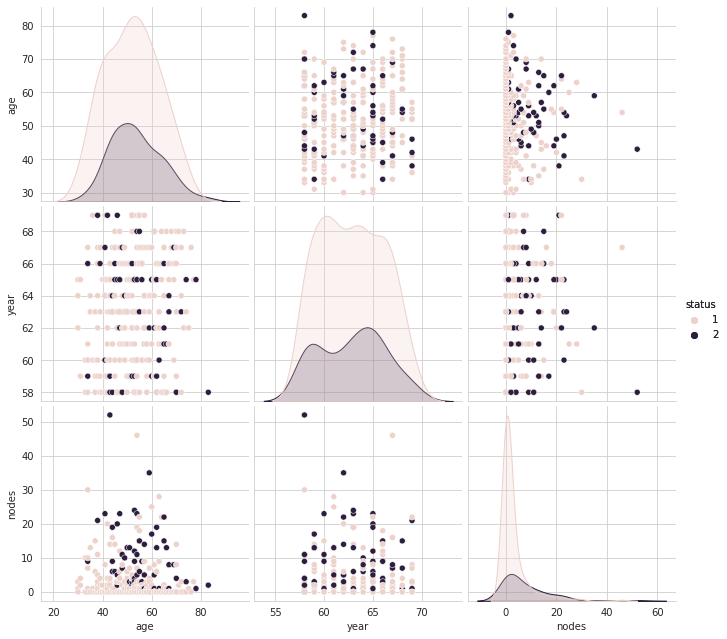

In [64]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue = 'status',height= 3)\
   .add_legend()

plt.show()

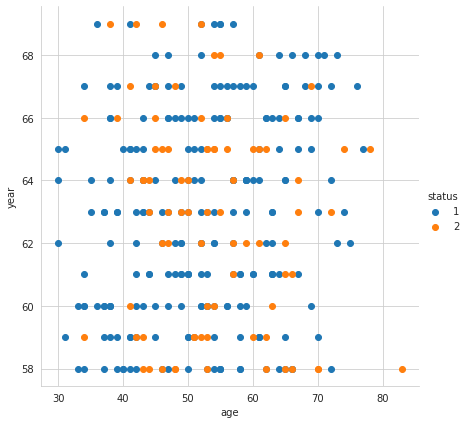

In [65]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status",size=6)\
   .map(plt.scatter, "age","year")\
   .add_legend()
plt.show()

From the pair plot we can compare all the attributes with one another, however, plots 1,5,9 can be ignored for now.



*   Plot 2: the data points cannot be distinguished because of the randomness in the plot.


*   Plot 3: In this plot the points are not completely seperable but can see the difference. From which we can make a small conclusion, people with no nodes tend to more than 5 years.
*   Plot 4: In the plot again age vs year we are unable to distinguish the points clearly.


*   Plot 5: Plot between nodes and years is not useful for insights.
*   Plot 6:Similar to plot 3.


*   plot 7: The data points are randomized needs another point of view for the plotting.








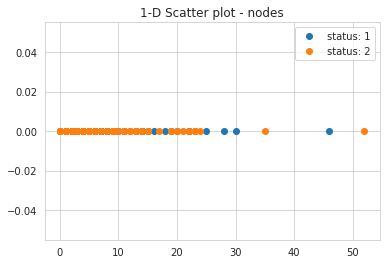

In [23]:
data_1 = data.loc[data["status"]== 1]
data_2 =data.loc[data['status']==2]

plt.plot(data_1["nodes"], np.zeros_like(data_1['nodes']),'o')
plt.plot(data_2['nodes'], np.zeros_like(data_2['nodes']),'o')
plt.legend(['status: 1', 'status: 2'])
plt.title('1-D Scatter plot - nodes')
plt.show()


1-D scatter plot with number of nodes, drawing any conclusions is hard from 1D plots. But number of nodes in both the status is almost same.

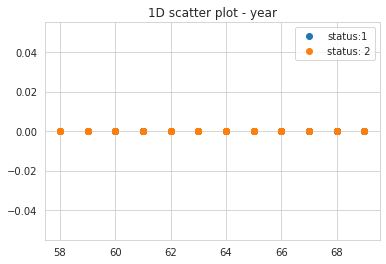

In [24]:
data_1 = data.loc[data["status"]== 1]
data_2 =data.loc[data['status']==2]

plt.plot(data_1["year"], np.zeros_like(data_1['year']),'o')
plt.plot(data_2['year'], np.zeros_like(data_2['year']),'o') 
plt.title("1D scatter plot - year")
plt.legend(['status:1', 'status: 2'])
plt.show()

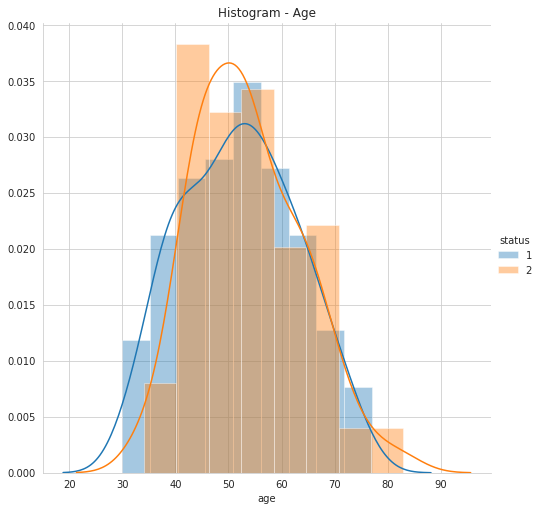

In [28]:
sns.FacetGrid(data, hue='status', height=7)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.title('Histogram - Age')
plt.show()

From the above histogram we can take the consideration that if the patient has age of 30 to 35 they survive more than 5 years.  
In ages 35- 40 the probability to survive more than 5 years is high.
In ages 40 - 50 the probbaility to survive less tahn 5 years is high.

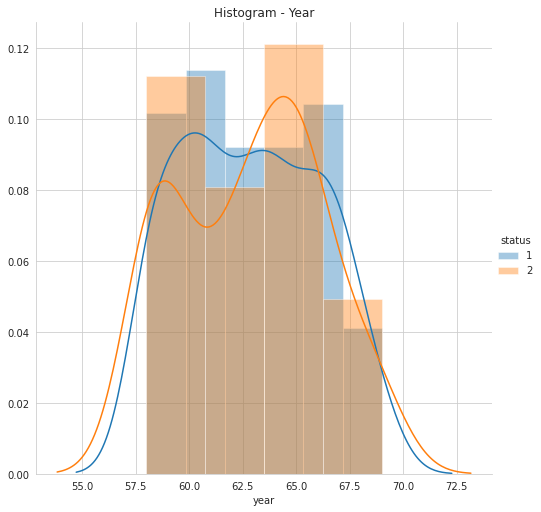

In [30]:
sns.FacetGrid(data, hue='status', height=7)\
   .map(sns.distplot,"year")\
   .add_legend()
plt.title('Histogram - Year')
plt.show()

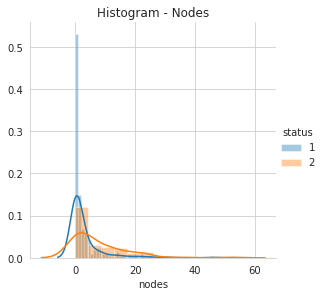

In [31]:
sns.FacetGrid(data, hue='status', height=4)\
   .map(sns.distplot,"nodes")\
   .add_legend()
plt.title("Histogram - Nodes")
plt.show()

In the PDF plot for nodes we can draw conclusion patients survive longer if they have number of nodes between 0-10.
if no nodes patients will survive, if nodes less than 5 very good chance of surviving. greater than 5 less chance of surviving more than 5 years.



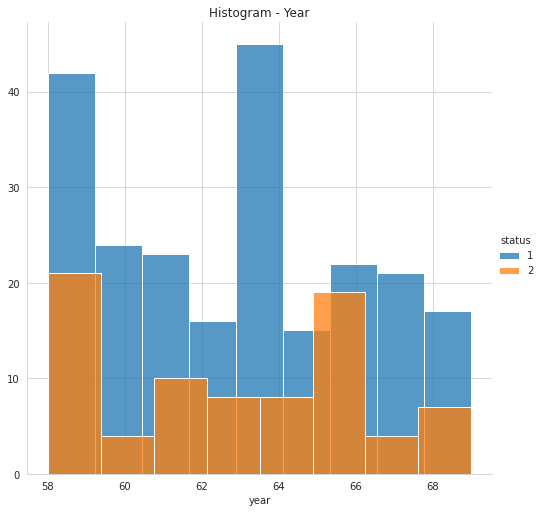

In [33]:
sns.FacetGrid(data, hue='status', height=7)\
   .map(sns.histplot,"year")\
   .add_legend()
plt.title('Histogram - Year')
plt.show()

This plot points out there are both types of patients in every operated year. So we cannot use this feature to classify.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


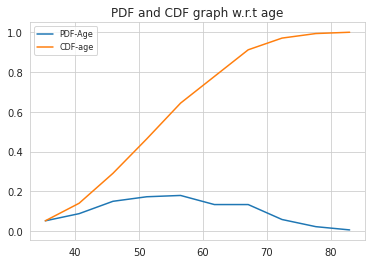

In [34]:
counts, bin_edges = np.histogram(data['age'],bins= 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
print(counts)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["PDF-Age",'CDF-age'], loc=2, prop={'size':8})
print(cdf)
plt.title("PDF and CDF graph w.r.t age")
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


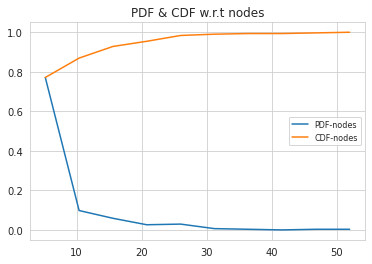

In [36]:
counts, bin_edges = np.histogram(data['nodes'],bins= 10, density =True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF & CDF w.r.t nodes")
plt.legend(['PDF-nodes', 'CDF-nodes'], loc=5, prop={"size":8})
print(cdf)
plt.show()

In [37]:
high_survivalrate = data.loc[data["status"] ==1]
low_survivalrate =data.loc[data["status"]==2]
high_survivalrate.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [38]:
low_survivalrate.head()

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


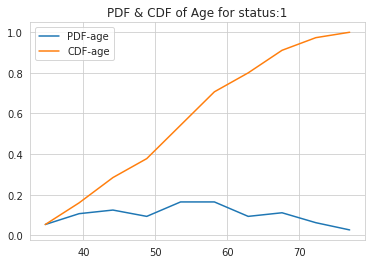

In [39]:
counts, bin_edges = np.histogram(high_survivalrate['age'],bins= 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
print(counts)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF & CDF of Age for status:1")
plt.legend(["PDF-age","CDF-age"])
print(cdf)
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


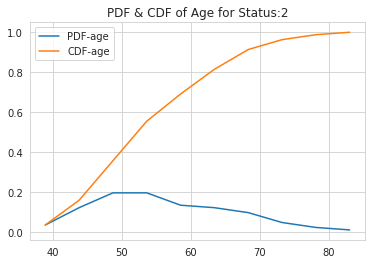

In [41]:
counts, bin_edges = np.histogram(low_survivalrate['age'],bins= 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
print(counts)
cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print(cdf)
plt.title('PDF & CDF of Age for Status:2')
plt.legend(['PDF-age','CDF-age'])
plt.show()

In [42]:
print("medians:")
print(np.median(high_survivalrate["nodes"]))
print(np.median(low_survivalrate["nodes"]))


medians:
0.0
4.0


In [43]:
print("means:")
print(np.mean(high_survivalrate["nodes"]))
print(np.mean(low_survivalrate["nodes"]))


means:
2.7911111111111113
7.45679012345679


In [44]:
print("Standard Deviation:")
print(np.std(high_survivalrate["nodes"]))
print(np.std(low_survivalrate["nodes"]))

Standard Deviation:
5.857258449412131
9.128776076761632


The mean and standard deviatioon values show that the survival rate of a patient below 5 years has more possibility and spread in value.

In [45]:
print("Quantiles:")
print(np.percentile(high_survivalrate["nodes"],[25,50,75,100]))
print(np.percentile(low_survivalrate["nodes"],[25,50,75,100]))

Quantiles:
[ 0.  0.  3. 46.]
[ 1.  4. 11. 52.]


Observing the quantiles we can derive people with nodes less than 3 suriveval rate is high.
where as with nodes more than 4 the survival rate is less

In [46]:
print(np.percentile(high_survivalrate["nodes"],90))

8.0


In [47]:
from statsmodels import robust
print("Median Absolute Deviation:")
print(robust.mad(high_survivalrate["nodes"]))
print(robust.mad(low_survivalrate["nodes"]))



Median Absolute Deviation:
0.0
5.930408874022408


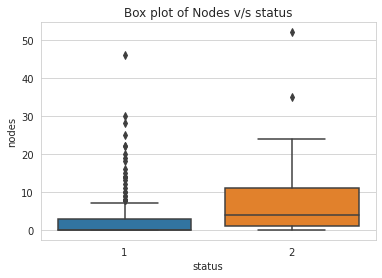

In [50]:
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Box plot of Nodes v/s status')
plt.show()

In the box plot the colored region represents values between 25 th percentile and 75th percentile. 
For status 1 the number of nodes lies in between 0 - 4, where status 2 the maximum number of nodes range between 3-12.



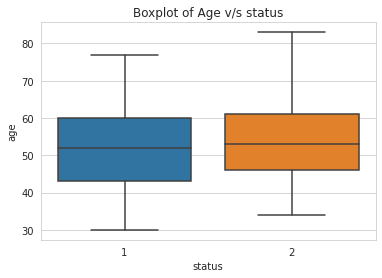

In [52]:
sns.boxplot(x='status',y='age',data=data)
plt.title('Boxplot of Age v/s status')
plt.show()

we can observe the ages between 42 - 60 have good survival rate for status 1 patients.
And for ages between 46- 62 its a bit hard.

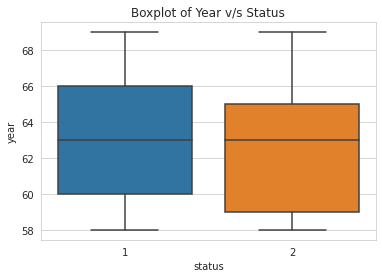

In [54]:
sns.boxplot(x='status',y='year',data=data)
plt.title('Boxplot of Year v/s Status')
plt.show()

In the box plot of year  vs status, we can draw a that for patients in status 2 most of them lie in between 1959 - 1965 years.
Whereas status 1 patients show good survival rate throughout the years.

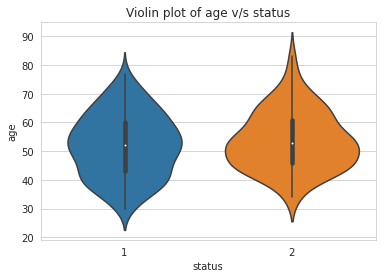

In [56]:
sns.violinplot(x="status", y="age",data=data, size=6)
plt.title('Violin plot of age v/s status')
plt.show()

The violin plot is similar to boxplot but it clearly shows the spread of data at the given feature.

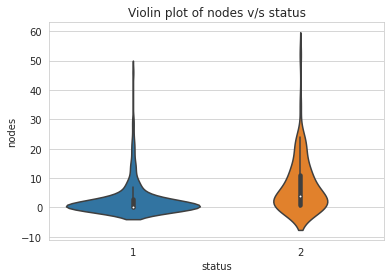

In [57]:
sns.violinplot(x="status", y="nodes",data=data, size=6)
plt.title('Violin plot of nodes v/s status')
plt.show()

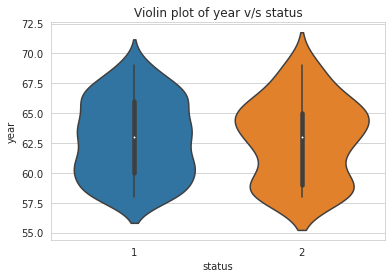

In [58]:
sns.violinplot(x="status", y="year",data=data, size=6)
plt.title('Violin plot of year v/s status')
plt.show()

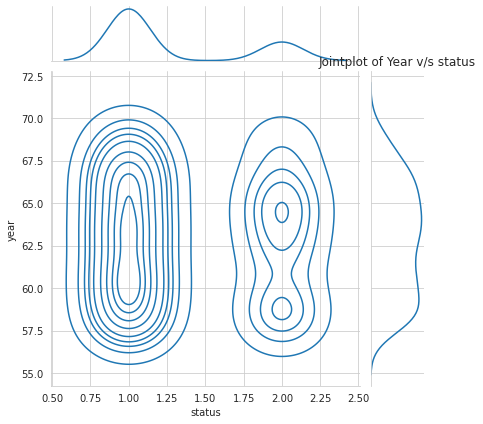

In [60]:
sns.jointplot(x="status", y="year",data=data, kind="kde")

plt.show()

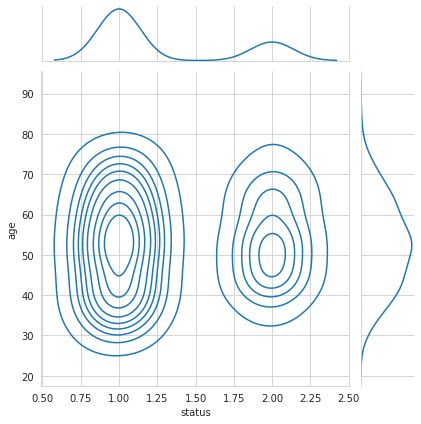

In [61]:
sns.jointplot(x="status", y="age",data=data, kind="kde")
plt.show()

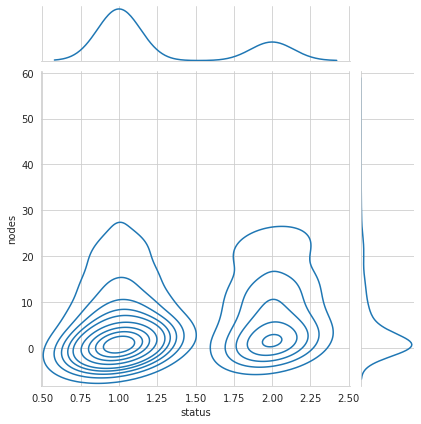

In [62]:
sns.jointplot(x="status", y="nodes",data=data, kind="kde")
plt.show()

Conclusion:
We can conclude from the data that if the number of nodes is greater or equal to 4 and the age is greater than 50 that patient cannot definitely survive. if he has lesser nodes or lesser age has good chance to survive. I fthe numbe rof nodes is zero and age is less than 40 the patient is good.
